In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train = X_train/255
X_test = X_test/255

In [4]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

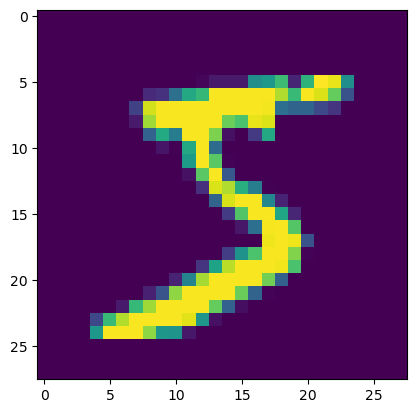

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
model = keras.Sequential([
    #conv layers
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    #dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=10)

2024-06-24 16:44:28.939230: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-06-24 16:44:28.939250: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-24 16:44:28.939255: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-24 16:44:28.939466: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-24 16:44:28.939487: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10
   1/1875 [..............................] - ETA: 10:34 - loss: 2.2765 - accuracy: 0.1875

2024-06-24 16:44:29.341930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 14s 7ms/step - loss: 0.2032 - accuracy: 0.9366
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0740 - accuracy: 0.9775
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0527 - accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0409 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0328 - accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0286 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0267 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0211 - accuracy: 0.9937
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0213 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0180

In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0695 - accuracy: 0.9871


[0.06946023553609848, 0.9871000051498413]

In [12]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
np.argmax(y_pred[35])

2

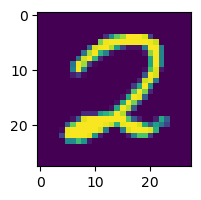

In [14]:
plt.figure(figsize=(15,2))
plt.imshow(X_test[35])